# Challenge 2

In this challenge we will continue working with the `Pokemon` dataset. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemon are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.


## Problem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [99]:
# Import libraries
import numpy as np
import pandas as pd

In [100]:
# Importing the dataset
pokemon = pd.read_csv('pokemon.csv')

From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemon?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [101]:
y = pokemon[['Total']]
X = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y

,Total
0,318
1,405
2,525
3,625
4,309
...,...
795,600
796,700
797,600
798,680


In [102]:
X.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [103]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0


In [104]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X)
Xn = MinMaxtransformer.transform(X)
print(Xn.shape)
Xn= pd.DataFrame(Xn,columns=X.columns)
Xn.head()

(800, 6)


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571
1,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286
2,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571
3,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571
4,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857


In [105]:
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=42)

In [106]:
print(Xn_train.shape)
print(Xn_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 6)
(160, 6)
(640, 1)
(160, 1)


In [107]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(Xn_train,y_train)

LinearRegression()

In [108]:
from sklearn.metrics import r2_score
predictions = lm.predict(Xn_train)
r2_score(y_train, predictions)

1.0

In [109]:

predictions_test = lm.predict(Xn_test)
r2_score(y_test, predictions_test)

1.0

In [110]:
y_test[:5]

,Total
696,600
667,485
63,350
533,520
66,385


In [111]:
predictions_test[:5]

array([[600.],
       [485.],
       [350.],
       [520.],
       [385.]])

In [112]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

4.7912255939503376e-27

In [113]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

6.921867951608394e-14

In [114]:
print(lm.coef_)

[[254. 185. 225. 184. 210. 175.]]


In [115]:
# 1.What is the formula to compute Total?
#Total = 254*HP + 185*Attack + 225*Defense + 184*Sp. Atk + 210*Sp. Def + 175*Speed

In [116]:
# 2.Does the formula work for all pokemon?
# yes. because r2_score= 1 and predictions_test[:5] are same like y_test[:5]

## Problem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](../images/one-hot-encoding.png)

In [131]:
# One-hot encode the Type 1 and Type 2 columns
type1_dummies = pd.get_dummies(pokemon['Type 1'])
type2_dummies = pd.get_dummies(pokemon['Type 2'])

# Concatenate the two one-hot encoded dataframes
type_dummies = type1_dummies.add(type2_dummies, fill_value=0)

# Select the 18 columns with the highest Total value
selected_cols = type_dummies.sum().sort_values(ascending=False)[:18].index

# Select only the columns with the selected prefix
type_dummies = type_dummies.loc[:, type_dummies.columns.str.startswith(tuple(selected_cols))]

# Display the resulting dataframe
type_dummies

type_dummies = type_dummies[['Grass','Poison','Fire','Flying','Dragon','Water','Bug','Normal','Electric','Ground','Fairy','Fighting','Psychic','Rock','Steel','Ice','Ghost','Dark']]
type_dummies

,Grass,Poison,Fire,Flying,Dragon,Water,Bug,Normal,Electric,Ground,Fairy,Fighting,Psychic,Rock,Steel,Ice,Ghost,Dark
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
796,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
798,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [117]:
type_df = pd.get_dummies(pokemon[['Type 1', 'Type 2']].fillna('None'))
type_df

,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
pokemon1 = pd.concat([pokemon, type_df], axis=1)
pokemon1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,0,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,0,0,0,0,1,0,0,0,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0,0,0,0,0,0,0,0,0,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0,0,0,0,0,0,0,0,0,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,0,0,0,0,0,0,0,0,0,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0,0,0,0,0,0,0,0,0,0


## Problem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [134]:
data = pd.concat([type_dummies,pokemon['Total']], axis=1)
data

,Grass,Poison,Fire,Flying,Dragon,Water,Bug,Normal,Electric,Ground,Fairy,Fighting,Psychic,Rock,Steel,Ice,Ghost,Dark,Total
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,318
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,405
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,525
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,625
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,600
796,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,700
797,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,600
798,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,680


In [135]:
correlations_matrix = data.corr()
correlations_matrix

,Grass,Poison,Fire,Flying,Dragon,Water,Bug,Normal,Electric,Ground,Fairy,Fighting,Psychic,Rock,Steel,Ice,Ghost,Dark,Total
Grass,1.000000,0.110372,-0.108248,-0.081366,-0.078818,-0.126894,-0.034430,-0.117156,-0.078818,-0.097033,-0.048756,-0.051171,-0.094009,-0.072829,-0.061537,-0.027476,0.075316,-0.048339,-0.052592
Poison,0.110372,1.000000,-0.085471,-0.067950,-0.055525,-0.073986,0.121210,-0.110800,-0.074838,-0.053878,-0.066495,-0.039613,-0.103195,-0.081036,-0.074036,-0.064726,0.008736,-0.018227,-0.090441
Fire,-0.108248,-0.085471,1.000000,-0.028855,-0.038069,-0.114850,-0.060536,-0.085097,-0.057104,-0.022621,-0.067651,0.051130,-0.061243,-0.064677,-0.056108,-0.065851,-0.013459,-0.020368,0.078726
Flying,-0.081366,-0.067950,-0.028855,1.000000,0.026237,-0.092030,0.064571,0.125506,-0.020407,-0.060578,-0.052669,-0.086119,-0.063872,-0.048221,-0.081400,-0.049498,-0.061555,-0.022164,0.059383
Dragon,-0.078818,-0.055525,-0.038069,0.026237,1.000000,-0.083285,-0.081200,-0.098702,-0.024000,0.052430,-0.035541,-0.068775,-0.026557,-0.032360,-0.044417,0.015173,-0.019410,-0.003963,0.229705
Water,-0.126894,-0.073986,-0.114850,-0.092030,-0.083285,1.000000,-0.123983,-0.154994,-0.069109,-0.006844,-0.067703,-0.073778,-0.099639,0.011447,-0.096131,0.000242,-0.077314,-0.028548,-0.021665
Bug,-0.034430,0.121210,-0.060536,0.064571,-0.081200,-0.123983,1.000000,-0.120219,-0.045111,-0.063544,-0.072148,-0.048645,-0.111968,-0.003706,0.047178,-0.070229,-0.058915,-0.082062,-0.145781
Normal,-0.117156,-0.110800,-0.085097,0.125506,-0.098702,-0.154994,-0.120219,1.000000,-0.067737,-0.102044,-0.001720,-0.071687,-0.112381,-0.106877,-0.097645,-0.085366,-0.094420,-0.099751,-0.105331
Electric,-0.078818,-0.074838,-0.057104,-0.020407,-0.024000,-0.069109,-0.045111,-0.067737,1.000000,-0.059420,-0.035541,-0.068775,-0.091928,-0.072188,-0.001346,-0.033382,-0.041592,-0.067375,0.020971
Ground,-0.097033,-0.053878,-0.022621,-0.060578,0.052430,-0.006844,-0.063544,-0.102044,-0.059420,1.000000,-0.069360,-0.080531,-0.079079,0.072085,-0.020771,-0.003872,-0.035908,-0.023480,0.015060


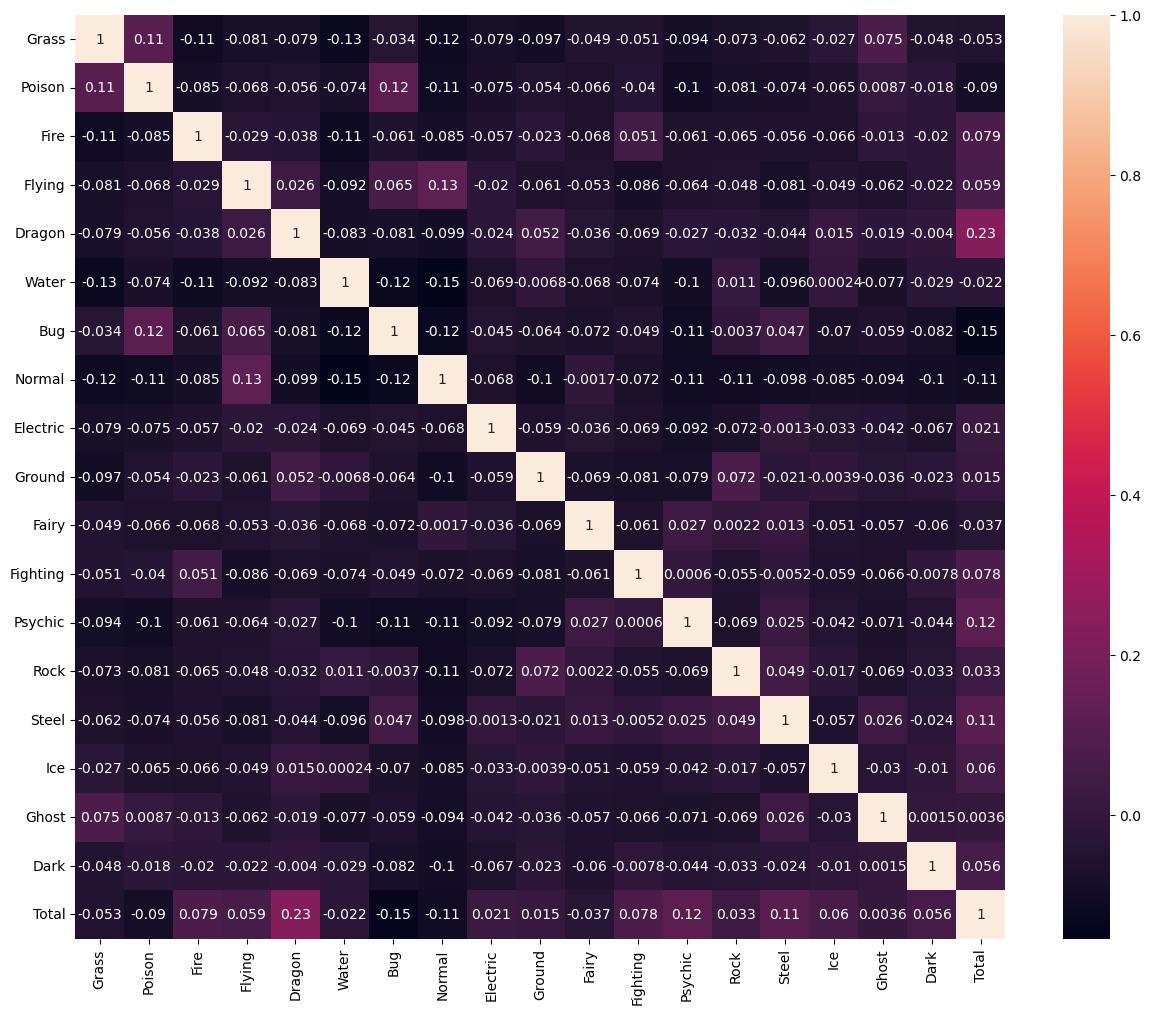

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(15, 12))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
# can see that the Dragon is the #1 pokemon type that is most likely to have the highest Total

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [141]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [142]:
pokemon['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [ ]:
# choose Type 1, because Type 1 has 32 Dragon and Type 2 just 18 